In [13]:
import numpy as np
import pandas
from sklearn.model_selection import train_test_split, GridSearchCV

# We generate 1000 points, with 2 features, and 2 classes
# Let's pick a center for each class
center1 = np.array([0, 0])
center2 = np.array([1, 1])
# We generate 500 points around each center, distributed normally
data1 = np.random.normal(loc=center1, # mean
scale=(0.5, 0.3), # std deviation
size=(500, 2))
data2 = np.random.normal(loc=center2, # mean
scale=(0.3, 0.5), # std deviation
size=(500, 2))
# We create the labels
labels1 = np.zeros(500)
labels2 = np.ones(500)
# We concatenate the data and the labels
data1 = np.concatenate((data1, labels1.reshape(-1, 1)), axis=1)
data2 = np.concatenate((data2, labels2.reshape(-1, 1)), axis=1)
# We concatenate the two classes
data = np.concatenate((data1, data2), axis=0)
# We shuffle the data
np.random.shuffle(data)
# We split the data into train, and test sets
train, test = train_test_split(data, test_size=0.2)
# (optional)
# We make a dataframe to plot the data, with columns x, y, label, set
train_df = pandas.DataFrame(train, columns=['x', 'y', 'label'])
train_df['set'] = 'train'
test_df = pandas.DataFrame(test, columns=['x', 'y', 'label'])
test_df['set'] = 'test'
data_df = pandas.concat([train_df, test_df], axis=0)
del train_df, test_df
# We save the data
# np.save('./data/generated_data.npy', data)
# np.save('./data/generated_data_train.npy', train)
# np.save('./data/generated_data_test.npy', test)
# data_df.to_csv('./data/generated_data.csv', index=False)

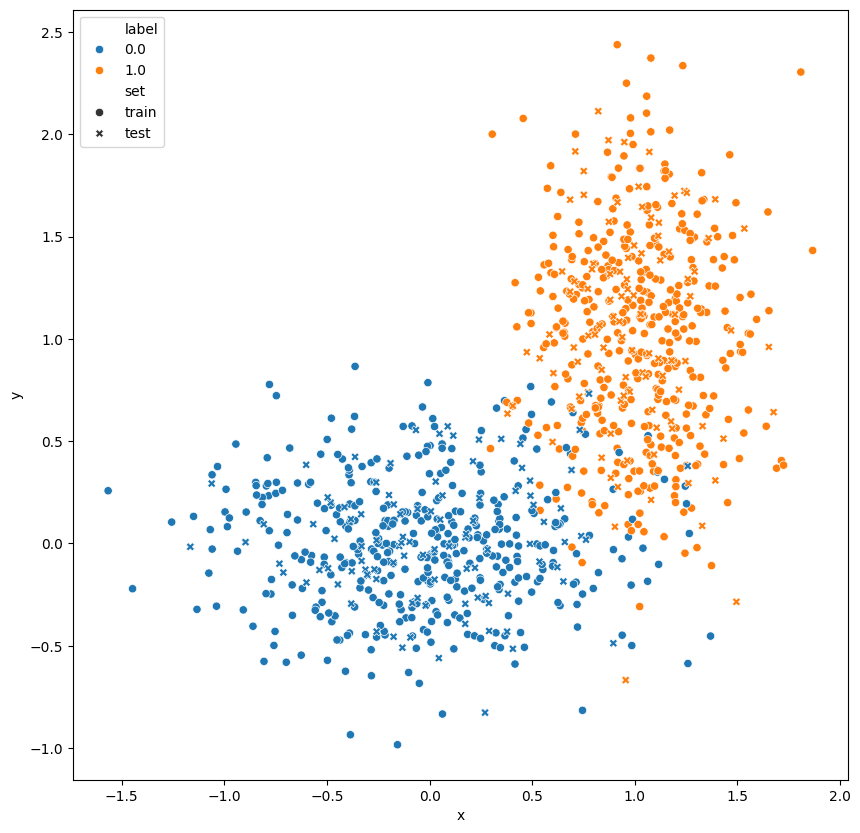

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.scatterplot(x='x', y='y', hue='label', style='set', data=data_df)
plt.show()

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best Parameters:  {'C': 25, 'gamma': 0.1}


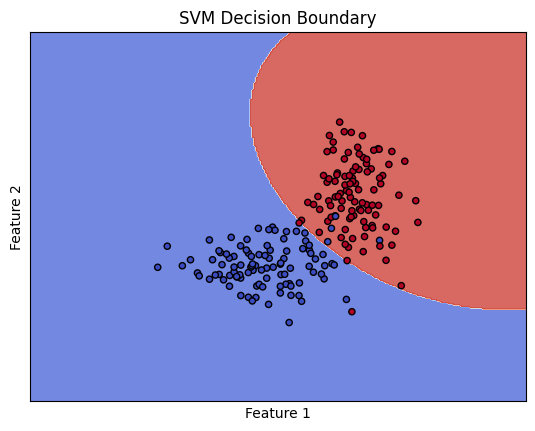

In [15]:
from sklearn.svm import SVC

# Separate features and labels
X_train = train[:, :2]  # first two columns are features
y_train = train[:, 2]   # last column is the label

X_test = test[:, :2]  # first two columns are features
y_test = test[:, 2]   # last column is the label

# Hyperparameter Tuning
param_grid = {
    'C': [0.1, 1, 10, 25, 50], 
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1], 
}

# Initialize the GridSearchCV object for rbf
grid_search_rbf = GridSearchCV(SVC(probability=True, kernel="rbf"), param_grid, cv=3, scoring='f1_micro', verbose=1)

grid_search_rbf.fit(X_train, y_train)

# Create mesh to plot in
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# The best hyperparameters found
print("Best Parameters: ", grid_search_rbf.best_params_)

# svc model with the best parameters
model_svc_rbf = grid_search_rbf.best_estimator_

# Predict classifications for each point in the meshgrid
Z_rbf = model_svc_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z_rbf = Z_rbf.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z_rbf, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot the training points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('SVM Decision Boundary')
plt.show()

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best Parameters:  {'C': 0.1, 'gamma': 'scale'}


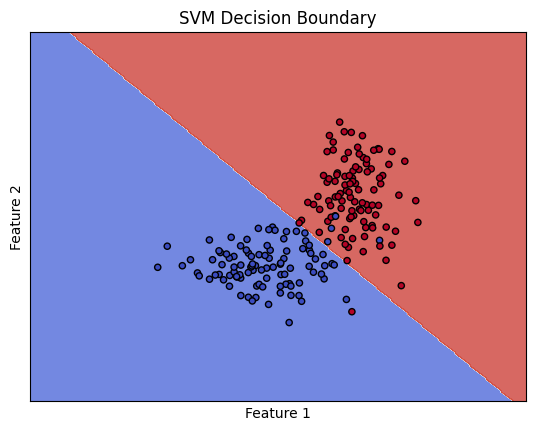

In [16]:
# Create mesh to plot in
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Initialize the GridSearchCV object for linear
grid_search_linear = GridSearchCV(SVC(probability=True, kernel="linear"), param_grid, cv=3, scoring='f1_micro', verbose=1)

grid_search_linear.fit(X_train, y_train)

# The best hyperparameters found
print("Best Parameters: ", grid_search_linear.best_params_)

# svc model with the best parameters
model_svc_linear = grid_search_linear.best_estimator_

# Predict classifications for each point in the meshgrid
Z_linear = model_svc_linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z_linear = Z_linear.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z_linear, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot the training points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('SVM Decision Boundary')
plt.show()

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best Parameters:  {'C': 1, 'gamma': 'scale'}


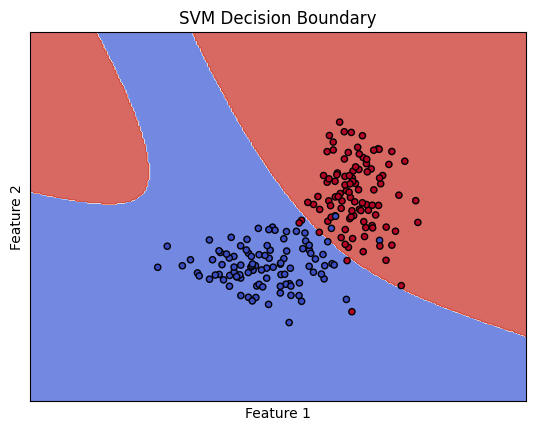

In [17]:
# Create mesh to plot in
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Initialize the GridSearchCV object for poly
grid_search_poly = GridSearchCV(SVC(probability=True, kernel="poly"), param_grid, cv=3, scoring='f1_micro', verbose=1)

grid_search_poly.fit(X_train, y_train)

# The best hyperparameters found
print("Best Parameters: ", grid_search_poly.best_params_)

# svc model with the best parameters
model_svc_poly = grid_search_poly.best_estimator_

# Predict classifications for each point in the meshgrid
Z_poly = model_svc_poly.predict(np.c_[xx.ravel(), yy.ravel()])
Z_poly = Z_poly.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z_poly, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot training points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('SVM Decision Boundary')
plt.show()

# SVM Practice Session
In this session, we will see how to use Support Vector Machines (SVM) to classify data. In a first time, we will work with generated data, and then we will use SVM to try and predict pulsars stars.

## Imports

In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

## Data generation

In [2]:
# We generate 1000 points, with 2 features, and 2 classes
# Let's pick a center for each class
center1 = np.array([0, 0])
center2 = np.array([1, 1])
# We generate 500 points around each center, distributed normally
data1 = np.random.normal(loc=center1, # mean
                         scale=(0.5, 0.3), # std deviation
                         size=(500, 2))
data2 = np.random.normal(loc=center2, # mean
                         scale=(0.3, 0.5), # std deviation
                         size=(500, 2))
# We create the labels
labels1 = np.zeros(500)
labels2 = np.ones(500)
# We concatenate the data and the labels
data1 = np.concatenate((data1, labels1.reshape(-1, 1)), axis=1)
data2 = np.concatenate((data2, labels2.reshape(-1, 1)), axis=1)
# We concatenate the two classes
data = np.concatenate((data1, data2), axis=0)
# We shuffle the data
np.random.shuffle(data)
# We split the data into train, and test sets (80% / 20 %)
# (optional)
# We make a dataframe to plot the data, with columns x, y, label, set
# We save the data


Let's plot the data, to see what it looks like

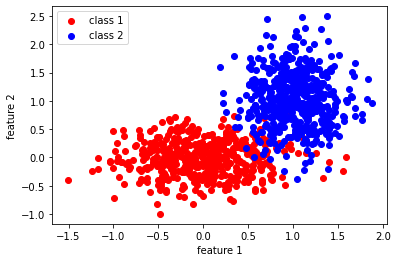

In [3]:
plt.scatter(data1[:, 0], data1[:, 1], c='r', label='class 1')
plt.scatter(data2[:, 0], data2[:, 1], c='b', label='class 2')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.show()


## SVM 

Note : use the GridSearchCV() function from sklearn to find the best hyperparameters for the SVM model.
In order to plot the results of the grid search, you may consider heatmaps.
Howerever, you may notice that we are concidering 3 hyperparameters, which makes it impossible to plot in a 2D space, and a 3D heatmap may be hard to read.
Hence, you may consider plotting only 2 hyperparameters at a time, and average over the third one !

To get the results from GridSearchCV, you may use `grid.cv_results_["mean_test_score"]` and `grid.cv_results_["params"]` to get the mean test score and the hyperparameters used for each fold.
A 'nice' way of getting a unified collection of the hyperparameters and their corresponding score would be a peice of code such as :
```python
d = []
i=0
for p in grid.cv_results_["params"]:
    d.append(p)
    d[-1]["result"] = grid.cv_results_["mean_test_score"][i]
    i += 1
print(d)
``` 

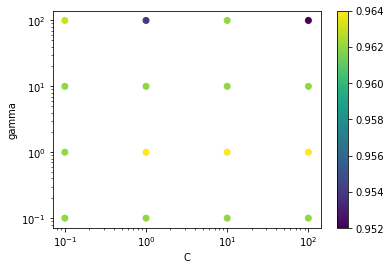

{'C': 10, 'gamma': 10, 'kernel': 'rbf'}
0.978


In [4]:
# We tune the hyperparameters : C, kernel, gamma
params = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf'], 'gamma': [0.1, 1, 10, 100]}
# We make a classifier
clf = svm.SVC()
# We make a grid search using GridSearchCV()
grid = GridSearchCV(clf, params, cv=5)

# Note: the cross-validation behind GridSearchCV automatically splits the data into
# training and validation sets for each fold. It trains the model on the training set and
# evaluates its performance on the validation set. This process is repeated for each fold,
# and the average performance is used to assess the model's generalization ability.
# GridSearchCV exhaustively tests all possible combinations of hyperparameters specified
# in the hyperparams dictionary, and selects the combination that gives the best average
# performance across all folds. This helps in finding the optimal hyperparameters for the
# Support Vector Machine model without manually trying each combination.

# We train it
grid.fit(data[:, :2], data[:, 2])
# We plot the accuracy as a function of the hyper parameters. Thinks of a 'smart' way of plotting it.

d = []
for i in range(len(params['C'])):
    for j in range(len(params['gamma'])):
        d.append([params['C'][i], params['gamma'][j], grid.cv_results_['mean_test_score'][j + 4 * i]])
d = np.array(d)
plt.scatter(d[:, 0], d[:, 1], c=d[:, 2], cmap='viridis')
plt.colorbar()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('C')
plt.ylabel('gamma')
plt.show()


# figure, ax = plt.subplots(1, 1)
# sns.heatmap(grid.cv_results_['mean_test_score'].reshape(2, 4), annot=True, cmap='viridis', ax=ax)
# ax.set_xticklabels(params['gamma'])
# ax.set_yticklabels(params['C'])
# ax.set_xlabel('gamma')
# ax.set_ylabel('C')
# plt.show()

# We print the best hyperparameters
print(grid.best_params_)
# We select the best model and print the accuracy on the test set
best_model = grid.best_estimator_
print(best_model.score(data[:, :2], data[:, 2]))


## We can also plot the decision boundary

For better insight, we plot the decision boundary of the classifier with the hyperparameters : (C=1, kernel="linear"), (C=1, kernel="rbf"), (C=100, kernel="linear"), (C=100, kernel="rbf")

In [5]:
models = {1: {'C': 1, 'kernel': 'linear'},
          2: {'C': 1, 'kernel': 'rbf'},
          3: {'C': 100, 'kernel': 'linear'},
          4: {'C': 100, 'kernel': 'rbf'}}
# We make the classifiers
clfs = {key: svm.SVC(C=models[key]['C'], kernel=models[key]['kernel']) for key in models.keys()}
# We train them
for key in clfs.keys():
    clfs[key].fit(data[:, :2], data[:, 2])
# We get the accuracy on the test set
accs = {key: clfs[key].score(data[:, :2], data[:, 2]) for key in clfs.keys()}
print(accs)


{1: 0.965, 2: 0.966, 3: 0.965, 4: 0.973}


Note : In order to predict the full space xx, yy, you will need to use something as 
```python
model.predict(np.c_[xx.ravel(), yy.ravel()])
```
Please, note the use of `np.c_` to concatenate the two arrays, and the use of `ravel()` to flatten the arrays.

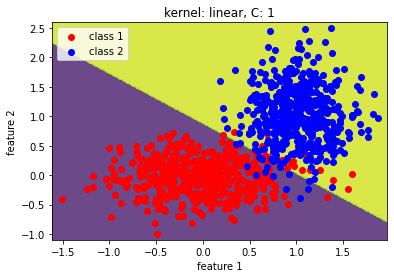

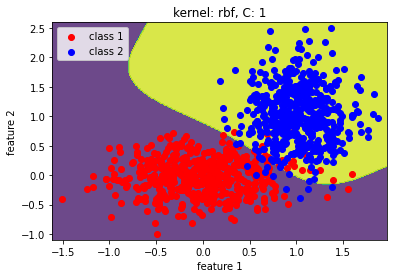

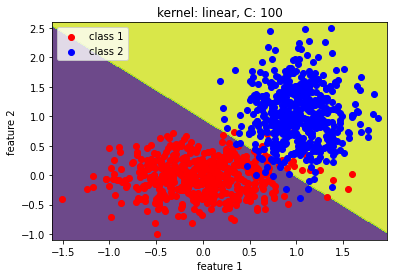

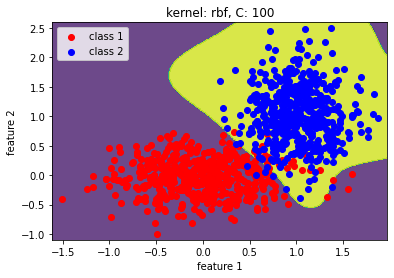

In [6]:
# We create a grid of points
x_min, x_max = data[:, 0].min() - 0.1, data[:, 0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# We plot the decision boundary for each classifier and print the accuracy on the test set


for key, value in models.items():
    # We predict the labels for each point in the grid
    Z = clfs[key].predict(np.c_[xx.ravel(), yy.ravel()])
    # We reshape the predictions to match the grid
    Z = Z.reshape(xx.shape)
    # We plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.8)
    # We plot the data
    plt.scatter(data1[:, 0], data1[:, 1], c='r', label='class 1')
    plt.scatter(data2[:, 0], data2[:, 1], c='b', label='class 2')
    plt.xlabel('feature 1')
    plt.ylabel('feature 2')
    plt.legend()
    plt.title(f'kernel: {value["kernel"]}, C: {value["C"]}')
    plt.show()
    

# Note: the model has been trained on the whole training set for each plot, that's why we do not get the exact same test accuracy as with the grid search (which used cross-validation).

## Real data - Pulsar stars

Apply the same procedure as in the previous section to find the best parameters for the pulsar dataset using cross-fold validation. The data is to be found with along to this notebook. The files are :
- pulsar_data_train.csv on which you must perform the training and validation
- pulsar_data_test.csv on which you must test your model.
The interest of having a separate 'test' file is that everybody can eveluate their model equialy. 
Competitions websites such as Kaggle keep there test dataset private to evaluate all participants' models on the same secrete data !

### Description

Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. They are of considerable scientific interest as probes of space-time, the interstellar medium, and states of matter. Machine learning tools are now being used to automatically label pulsar candidates to facilitate rapid analysis. In particular, classification systems are widely adopted, which treat the candidate datasets as binary classification problems.

### Heandling missing values

Somes values of the features are missing. You can use the `SimpleImputer` from `sklearn.impute` to fill the missing values. Or any other method you prefer.

You can load the data into a dataframe using the below code snippet:

```python
import pandas as pd
input_file = "pulsar_data_train.csv"
df = pd.read_csv(input_file)
```

### More information

Refer to the project's instructions for more information on this part.

In [7]:
# TODO : Here you go ! Good luck ! :)
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

input_file = "pulsar_data_train.csv"
data = pd.read_csv(input_file)

In [8]:
data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [9]:
missing_values = data.isnull().sum()
print(missing_values)

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       1735
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve          1178
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     625
target_class                                        0
dtype: int64


In [10]:
# handle missing data using SimpleImputer
cols = data.columns
imputer = SimpleImputer(strategy='mean')
imputer.fit(data)
imputer1_data = imputer.transform(data)


In [11]:
imputer1_data = pd.DataFrame(imputer1_data, columns=cols)
print(imputer1_data.isnull().sum())

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64


In [12]:
imputer1_data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,26.351318,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [13]:
# Handle missing data using IterativeImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer(max_iter=10, random_state=0)
imputer.fit(data)
imputer2_data = imputer.transform(data)

imputer2_data = pd.DataFrame(imputer2_data, columns=cols)
print(imputer2_data.isnull().sum())

imputer2_data.head()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64


,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,46.376201,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [14]:
# handle missing data using KNNImputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
imputer.fit(data)
imputer3_data = imputer.transform(data)

imputer3_data = pd.DataFrame(imputer3_data, columns=cols)
print(imputer3_data.isnull().sum())

imputer3_data.head()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64


,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,49.888095,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


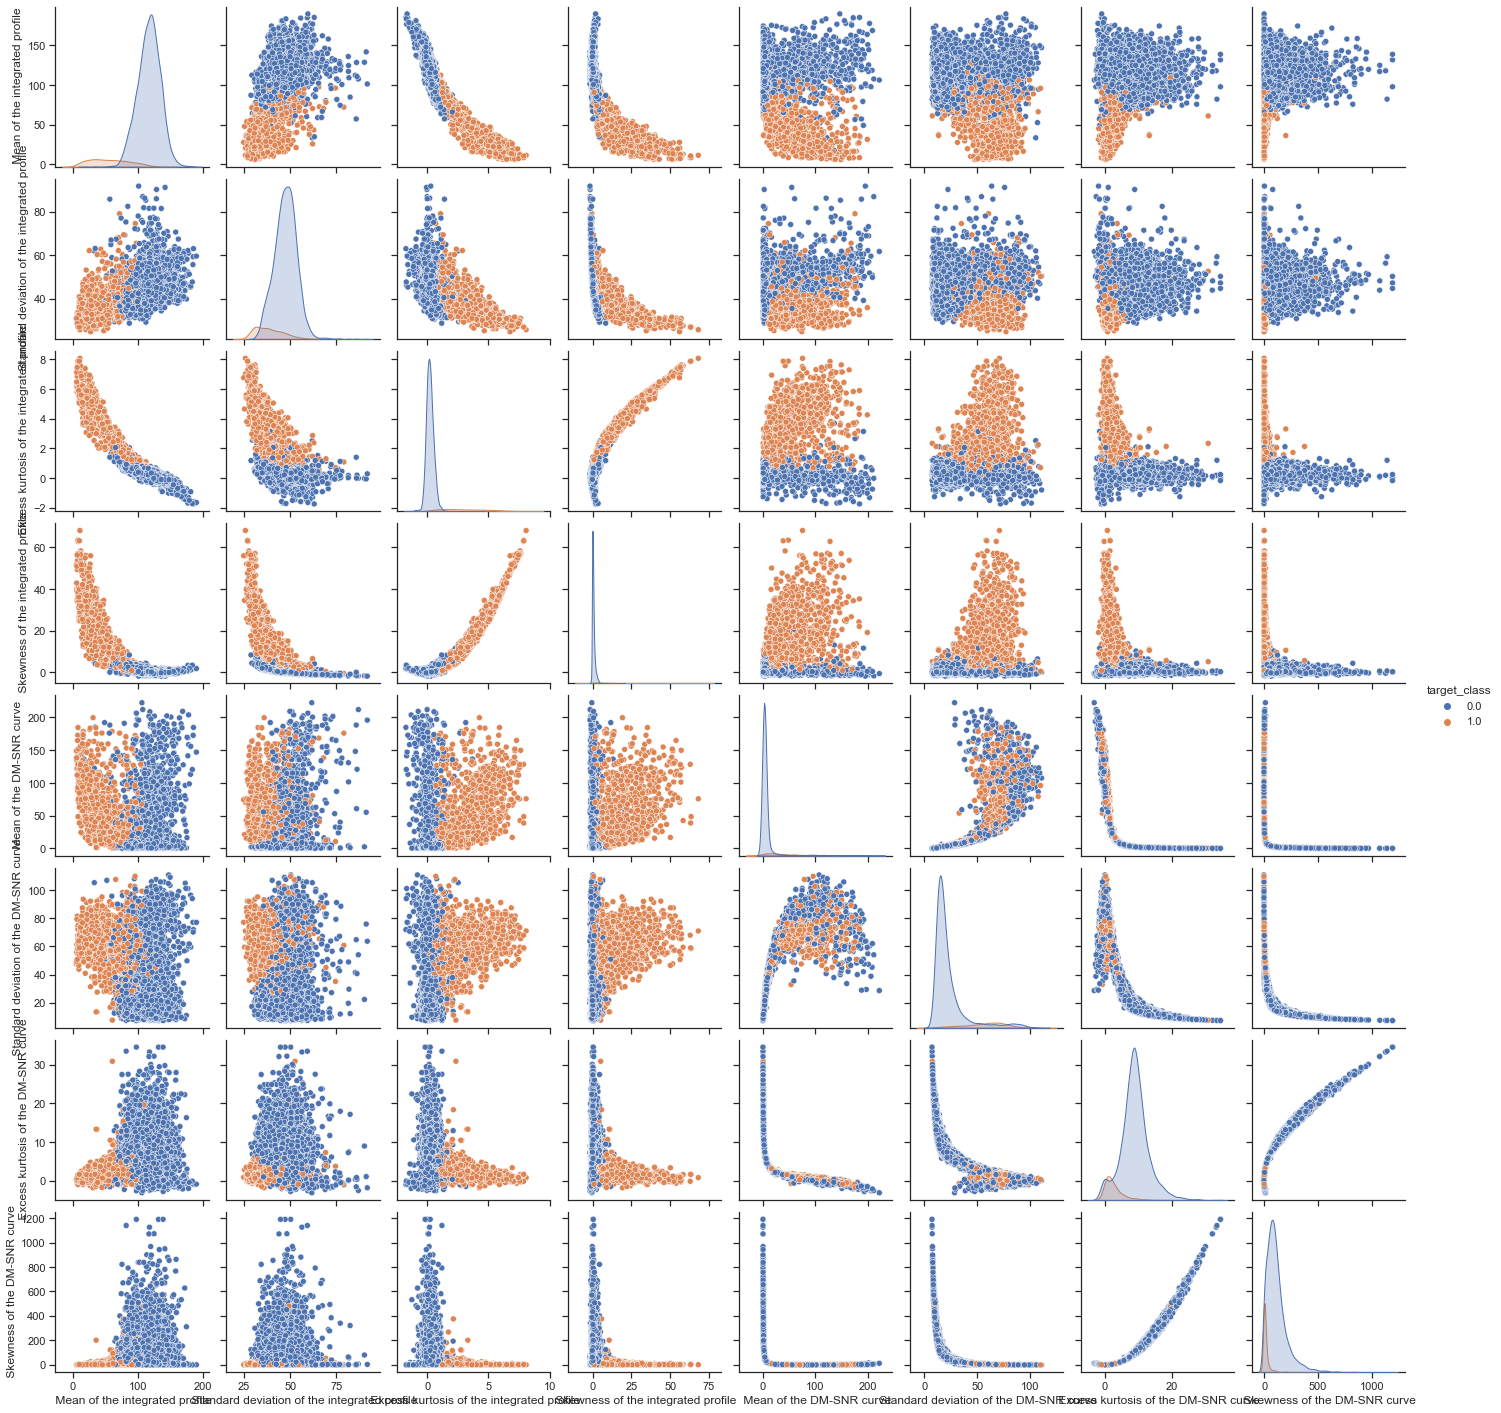

In [15]:
# Exploratory Data Analysis
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
sns.pairplot(data, hue='target_class')
plt.show()


It can be seen that the data is not scattered in all dimensions, and there is a pattern in the data.

In [22]:
# train test split
from sklearn.model_selection import train_test_split
X = imputer3_data.drop('target_class', axis=1)
y = imputer3_data['target_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# train the model
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)

# accuracy
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.9740622505985634


Accuracy on various methods:
1. SimpleImputer with mean: 0.9732641660015962
2. IterativeImputer: 0.9732641660015962
3. KNNImputer: 0.9740622505985634

The best accuracy is obtained by KNNImputer, so we will use this method to fill the missing values.

In [24]:
# Feature Engineering

# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# train the model
model = SVC()
model.fit(X_train, y_train)

# accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9788507581803672


In [25]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_estimator_)
grid_predictions = grid.predict(X_test)
accuracy = accuracy_score(y_test, grid_predictions)
print(f'Accuracy: {accuracy}')



Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.973 total time=   1.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.970 total time=   1.3s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.962 total time=   1.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.965 total time=   0.9s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.971 total time=   0.8s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.979 total time=   0.4s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.975 total time=   0.5s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.971 total time=   0.6s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.975 total time=   0.3s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.977 total time=   0.5s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.976 total time=   0.6s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

In [27]:
# train on best parameters
model = SVC(C=10, gamma=0.01, kernel='rbf')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.9788507581803672


In [28]:
# Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, grid_predictions))
print(classification_report(y_test, grid_predictions))


[[2275   10]
 [  41  180]]
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2285
         1.0       0.95      0.81      0.88       221

    accuracy                           0.98      2506
   macro avg       0.96      0.91      0.93      2506
weighted avg       0.98      0.98      0.98      2506

